In [ ]:
import torch
from sklearn.datasets import fetch_california_housing

x = torch.rand(10)

print(x)
print(x.size)


temp = torch.FloatTensor ( [22,23,24,78,99,88] )
print (temp)
print (temp.size() )



housing = fetch_california_housing()
print(housing.data)

# numpy arrayinden torch nesnesine dönüştürme,  pytorch tensor arrayine dönüştü
house = torch.from_numpy(housing.data)
print(house)

tensor([0.8402, 0.5025, 0.5871, 0.1048, 0.1496, 0.8956, 0.9712, 0.6382, 0.9437,
        0.2758])
<built-in method size of Tensor object at 0x78f6b6adac50>
tensor([22., 23., 24., 78., 99., 88.])
torch.Size([6])
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
tensor([[   8.3252,   41.0000,    6.9841,  ...,    2.5556,   37.8800,
         -122.2300],
        [   8.3014,   21.0000,    6.2381,  ...,    2.1098,   37.8600,
         -122.2200],
        [   7.2574,   52.0000,    8.2881,  ..

In [ ]:
# DATASET DOSYASINI GOOGLE DRİVE /tmp klasörüne unzip edilmesi
import shutil
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Filepath kontrol edilmesi
import os

file_path = r"/content/gdrive/MyDrive/kedi.jpg"
if os.path.exists(file_path):
    print("Dosya bulundu.")
else:
    print("Dosya bulunamadı.")

Dosya bulundu.


In [ ]:
from PIL import Image
import numpy as np
import torch
from matplotlib import pyplot as plt


kedi  = np.array ( Image.open(file_path).resize( (224,224) )   )
keditorch = torch.from_numpy(kedi)

print(np.shape(kedi))
print ( keditorch.size() )

plt.imsave ( "kedi9.jpeg", keditorch[25:150, 125:200,:]  )

(224, 224, 3)
torch.Size([224, 224, 3])


In [ ]:
import torch

rand1 = torch.rand(2,2)
rand2 = torch.rand(2,2)

print (rand1, rand2)
print (rand1*rand2)

print (rand1.mul (rand2))



tensor([[0.2223, 0.4827],
        [0.3932, 0.8580]]) tensor([[0.0605, 0.9355],
        [0.5280, 0.2030]])
tensor([[0.0134, 0.4515],
        [0.2076, 0.1742]])
tensor([[0.0134, 0.4515],
        [0.2076, 0.1742]])


In [ ]:
import torch

rand1 = torch.rand(10000,10000)
rand2 = torch.rand(10000,10000)

print(".")
rand1.matmul(rand2)

print("...")

# rand1 = rand1.cuda()
# rand2 = rand2.cuda()



.
...


In [ ]:
#Ders 5 : Lineer Regressyon

import numpy as np
import torch



In [ ]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad= True)
b = torch.tensor(5., requires_grad= True)

In [ ]:
print(x)
print(w)
print(b)


tensor(3.)
tensor(4., requires_grad=True)
tensor(5., requires_grad=True)


In [ ]:
y= w*x +b
print(y)

tensor(17., grad_fn=<AddBackward0>)


In [ ]:
y.backward()

In [ ]:
print ( "dy/dw: " , w.grad)
print(("dy/db: "  , b.grad))

dy/dw:  tensor(3.)
('dy/db: ', tensor(1.))


In [ ]:

# Inputs ( temp, rainfall, humidity)

inputs = np.array ( [  [73,67, 43] , [91,88,64] , [87,134,58] , [ 102, 43,37] , [69,96,70] ],  dtype='float32')

# Targets ( apples,oranges)

targets = np.array (  [  [56,70], [81,101] , [119,133], [22,37] , [103,119] ]  , dtype='float32' )

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)


tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
# Linear Regression Model from scratch

w = torch.randn( 2,3, requires_grad= True)
b = torch.randn(2, requires_grad= True)

print (w)
print (b)


tensor([[-0.3298, -0.1565, -0.9653],
        [-0.0657,  2.1059, -1.5632]], requires_grad=True)
tensor([-0.1484, -0.1163], requires_grad=True)


In [ ]:
# Model oluşturduk  y=mx+b
def model (x):
  return x @ w.t() + b

In [ ]:
preds = model (inputs)
print(preds)

tensor([[ -76.2161,   68.9677],
        [-105.7104,   79.1821],
        [-105.7984,  185.6975],
        [ -76.2312,   25.9000],
        [-105.4997,   88.0950]], grad_fn=<AddBackward0>)


In [ ]:
#Loss function kullanarak ne kadar fark çıktı bunu buluyoruz
# mean square error yöntemi kullanarak yapılır

def mse (real, preds):
  diff = real - preds
  return torch.sum(diff * diff) / diff.numel()

In [ ]:
loss = mse(targets, preds)
print(loss)
# bunun karekökü alınır ve hesaplanır

tensor(16033.0137, grad_fn=<DivBackward0>)


In [ ]:
#Compute Gradiens

loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
print(w)
print(w.grad)

tensor([[ 1.2316, -0.9502,  2.4061],
        [-0.1602,  1.1908,  0.6422]], requires_grad=True)
tensor([[6866.6587, 5249.7397, 3904.3445],
        [2656.7107, 2979.3489, 1767.9862]])


In [ ]:
print(b)
print(b.grad)

tensor([0.2911, 0.2079], requires_grad=True)
tensor([77.5901, 31.5548])


In [ ]:
w.grad.zero_()
b.grad.zero_()

print(w.grad)
print(b.grad)

AttributeError: 'NoneType' object has no attribute 'zero_'

In [ ]:
preds = model (inputs)
print(preds)

tensor([[119.7847,  91.2152],
        [169.3682, 125.3492],
        [104.3916, 175.7551],
        [163.3707,  54.1885],
        [149.9653, 142.4928]])


In [ ]:
loss = mse (targets ,preds)
print (loss)

tensor(3800.0581)


In [ ]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -=  b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
# with the new weights and biases, the model should have a lower loss

preds = model (inputs)
loss = mse (targets,preds)
print(loss)

In [ ]:
# Ders 7 -Lineer Regresyon
#Train for multiple epochs

## eger epoch sayısı yani tekrar saysısı artar ise loss fonksiyonu düşecektir
for i in range (1000):
  preds = model (inputs)
  loss = mse (preds, targets)
  loss.backward()

  with torch.no_grad() :
      w -= w.grad * 1e-5
      b -=b.grad * 1e-5
      w.grad.zero_()
      b.grad.zero_()


In [ ]:
  preds = model (inputs)
  loss = mse (preds, targets)
  print(loss)


tensor(54.3352, grad_fn=<DivBackward0>)


In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [ ]:
preds

tensor([[ 57.4844,  71.0930],
        [ 79.3991,  93.9169],
        [124.5653, 147.0567],
        [ 22.7694,  40.9418],
        [ 96.0229, 105.0770]], grad_fn=<AddBackward0>)

In [ ]:
# Ders 8 : Ağ katmanlarını Yazabilmek

import torch
from torch.nn import Linear
import numpy as np

girdi = torch.rand(1)
print(girdi)

Lineer11 = Linear (in_features=1, out_features = 1)

print("Ağırlık w : " , Lineer11.weight)

print ("Bias (y- eksen kestiği yer) : " , Lineer11.bias)

tensor([0.1932])
Ağırlık w :  Parameter containing:
tensor([[-0.5797]], requires_grad=True)
Bias (y- eksen kestiği yer) :  Parameter containing:
tensor([-0.4642], requires_grad=True)


In [ ]:
# Ders 8 : Ağ katmanlarını Yazabilmek
print ("Torch ile Lineer : " ,  Lineer11(girdi) )

print("Python ile Hesapladık")
print ( "mx+b ,  m*girdi +b   w*girdi +b ")

print( Lineer11.weight * girdi + Lineer11.bias )

Torch ile Lineer :  tensor([-0.5762], grad_fn=<ViewBackward0>)
Python ile Hesapladık
mx+b ,  m*girdi +b   w*girdi +b 
tensor([[-0.5762]], grad_fn=<AddBackward0>)


In [ ]:
# Ders 8 : Ağ katmanlarını Yazabilmek

Lin1 = Linear (in_features=1, out_features=5 , bias=True)
Lin2 = Linear (in_features=5, out_features=1 )
print("Lin1 : "  )
print(Lin1.weight)


print("Lin2 : "  )
print(Lin2.weight)

print ( Lin2 ( Lin1 (girdi) )  )


Lin1 : 
Parameter containing:
tensor([[ 0.1635],
        [ 0.1107],
        [-0.5621],
        [ 0.9636],
        [-0.2719]], requires_grad=True)
Lin2 : 
Parameter containing:
tensor([[ 0.1549, -0.0445, -0.0445, -0.0634,  0.2556]], requires_grad=True)
tensor([0.4134], grad_fn=<ViewBackward0>)


In [ ]:
# Ders 9: Yapay Sinir Ağımızı Yazalım
import torch
import torch.nn as nn
from sklearn.datasets import load_breast_cancer

device = torch.device("cpu")

#Hyper Parameter

input_size = 30
hidden_size = 500
num_classes = 2
num_epoch = 100

learning_rate = 1e-3

girdi, cikti = load_breast_cancer ( return_X_y=True)


print(girdi)
print(girdi.shape)
print(cikti)
print(cikti.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 

In [ ]:
# PyTorch Dersleri - 14 - Yapay Sinir Ağımızı Bitirelim
#Numpy array den Pytorch array e cevirme
# https://github.com/svishnu88/DLwithPyTorch/blob/master/Chapter3/3.%20Diving%20deep%20into%20Neural%20Networks.ipynb

train_input = torch.from_numpy(girdi).float() # float
train_output = torch.from_numpy(cikti)

class NeuralNet (nn.Module) :

  def __init__ (self,input_size, hidden_size , num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear (input_size, hidden_size)
    self.lrelu = nn.LeakyReLU (negative_slope=0.02)  # aktivasyon fonksiyonunun tanımlanması
    self.fc2 = nn.Linear ( hidden_size , num_classes )

  def forward ( self,input):
    outfc1 = self.fc1 (input)
    outfc1relu = self.lrelu(outfc1)
    out = self.fc2 ( outfc1relu )
    return out

model = NeuralNet ( input_size, hidden_size, num_classes )  # modelin tanımlanması

# Loss function tanımlanması (crossentropy loss kullandık)
lossf = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam( model.parameters() , lr =learning_rate )

for epoch in range (num_epoch) :

  outputs = model(train_input )
  loss = lossf ( outputs, train_output)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print ( 'Epoch [{}/{}] , Loss : {: .4f}'.format(epoch+1, num_epoch, loss.item()   ) )



# Örneğin test etmek isteseydik
# optimizer.zero_grad()
# outputs = model ("resim1.jpg")

Epoch [1/100] , Loss :  35.6482
Epoch [2/100] , Loss :  7.1757
Epoch [3/100] , Loss :  31.1002
Epoch [4/100] , Loss :  34.5772
Epoch [5/100] , Loss :  23.8474
Epoch [6/100] , Loss :  5.4143
Epoch [7/100] , Loss :  11.5460
Epoch [8/100] , Loss :  20.5662
Epoch [9/100] , Loss :  24.0592
Epoch [10/100] , Loss :  23.1728
Epoch [11/100] , Loss :  18.7497
Epoch [12/100] , Loss :  11.4277
Epoch [13/100] , Loss :  1.8761
Epoch [14/100] , Loss :  6.0976
Epoch [15/100] , Loss :  13.2013
Epoch [16/100] , Loss :  13.8707
Epoch [17/100] , Loss :  9.1881
Epoch [18/100] , Loss :  2.2214
Epoch [19/100] , Loss :  0.9142
Epoch [20/100] , Loss :  5.3228
Epoch [21/100] , Loss :  7.4874
Epoch [22/100] , Loss :  6.6619
Epoch [23/100] , Loss :  3.4024
Epoch [24/100] , Loss :  0.6117
Epoch [25/100] , Loss :  1.2213
Epoch [26/100] , Loss :  3.1009
Epoch [27/100] , Loss :  4.0826
Epoch [28/100] , Loss :  3.3328
Epoch [29/100] , Loss :  1.7513
Epoch [30/100] , Loss :  0.7107
Epoch [31/100] , Loss :  0.7537
Epoch

In [ ]:
# Ders 15 -- PyTorch - 15 - PyTorch ile CNN, CIFAR10


import torch
import torchvision
import torchvision.transforms as tfms

# mean ve std normalize edilidi (mean ,std) --> 3 kanal var rgb

# Veri dönüşümleri
transform = tfms.Compose([
    tfms.ToTensor(),
    tfms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10 ( root='./data' , train = True , download= True , transform = transform )

# batch size çok alırsanız ram e  güveniyorsunuz demektir, hızlı generalize eder
# batch size düşük alırsanız yavaş çalışır ama accuracy yüksektir, eğitim süresi uzar
# batch size her epoch ta kaç tane veri çekeyim anlamına gelir
trainloader = torch.utils.data.DataLoader ( trainset , shuffle = True , batch_size = 6 , num_workers=2  )  # batch size düşük alırsanız eğitim süresi uzar



testset = torchvision.datasets.CIFAR10 ( root='./data' , train = False , download= True , transform = transform )

testloader = torch.utils.data.DataLoader ( testset , shuffle = True , batch_size = 6 , num_workers=2  )

classes = ( 'plane' , 'car' , 'bird' , 'cat' , 'deer' , 'dog', 'frog' , 'horse' , 'ship' , 'truck' ) # 10 adet kategori var

100%|██████████| 170M/170M [00:03<00:00, 49.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


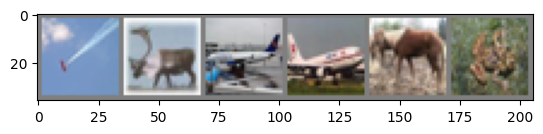

plane deer plane plane horse frog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow (img) :
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow ( np.transpose (npimg, (1,2,0)  ))
  plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow (torchvision.utils.make_grid (images) )

# Etiketleri yazdır
print(' '.join(f'{classes[labels[j]]}' for j in range(6)))

In [ ]:
# PyTorch - 18 - CNN Ağını Kuralım

import torch.nn as nn
import torch.nn.functional as F


class Net( nn.Module) :

  def __init__(self) :
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d (3,6,3)
    self.conv2 = nn.Conv2d (6,9,3)
    self.conv3 = nn.Conv2d (9,12,3)
    self.pool  = nn.MaxPool2d (  2,2 )
    self.conv4 = nn.Conv2d (12,12,3)
    self.fc1 = nn.Linear (1452 , 10)

# back propagation pytorch kendi hallediyor, biz sadece forward propogation halledeceğiz
  def forward(self,x):
    x = self.conv1(x)
    x = F.relu (x)
    x = F.relu ( self.conv3 ( F.relu (self.conv2(x))))
    x = F.relu ( self.conv4 ( self.pool(x) ))
    x = x.view ( -1, 1452 )
    x = self.fc1(x)
    x = F.softmax(x)
    return x


In [ ]:
# PyTorch - 20 - Eğitim İşlemi, Epohchs, Loss, Optimizer
# Loss ve optimizer yazıp sonra da ağımızı eğitelim

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # bu farklı bir loss fonksiyonda olabilirdi

optimizer = optim.Adam( net.parameters() , lr = 0.001 ) # sgd,adam,rms gibi optimizerlar var


# tekrar kısmı

for epoch in range(10):
  running_loss = 0

  for i, data in enumerate ( trainloader, 0) :
    inputs, labels = data
    optimizer.zero_grad()

    pred = net(inputs)
    loss = criterion (pred , labels )
    loss.backward()
    optimizer.step()

    running_loss = running_loss + loss.item()

    if i % 500 == 0:
      print(" [%d %5d]  loss %0.3f" % (epoch + 1, i + 1, running_loss / 500))



<ipython-input-4-e1be364c981e>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


 [1     1]  loss 0.005
 [1   501]  loss 2.228
 [1  1001]  loss 4.409
 [1  1501]  loss 6.545


KeyboardInterrupt: 